## Config

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [48]:
plt.rc('text', usetex = True)
SMALL_SIZE = 25
MEDIUM_SIZE = 32
BIGGER_SIZE = 37

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rcParams['figure.figsize'] = (7, 5)#

In [49]:
def twos_complement(hexstr,bits):    
    value = int(hexstr,16)    
    if value & (1 << (bits-1)):
        value -= 1 << bits
    return value

In [50]:
def get_data(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    imPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
        strIm = rawArray.iloc[i,3].split('h')[1]
        imPt[i] = twos_complement(strIm,nBits)
    return [t_us, realPt, imPt]

In [51]:
def fft(data, fs):
    vec = data[1] + 1j*data[2]
    fft = np.fft.fftshift(np.fft.fft(vec))
    freq = np.linspace(-fs/2, fs/2, len(fft))
    return [freq, fft]


## Input Data

In [52]:
dataIn = pd.read_table('unTonoSinRuido/dataIn.lst', sep=' ', skipinitialspace=True, skiprows=3, keep_default_na = False, header=None)

In [53]:
def get_data_real(rawArray, nBits, length=None):
    if length is None:
        length = len(rawArray)
    realPt = np.zeros(length)
    t_us = np.zeros(length)
    for i in range(length):
        t_us[i] = rawArray.iloc[i,0]
        strRe = rawArray.iloc[i,2].split('h')[1]
        realPt[i] = twos_complement(strRe,nBits)
    return [t_us, realPt]

In [54]:
dataInData = get_data_real(dataIn, 16, 5000)

(30000000000000.0, 30500000000000.0)

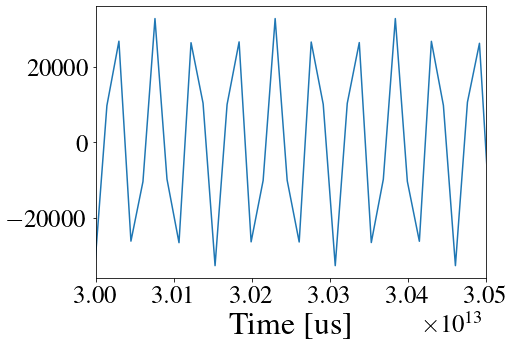

In [55]:
plt.figure()
plt.plot(dataInData[0]*1e6, dataInData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.05e13])

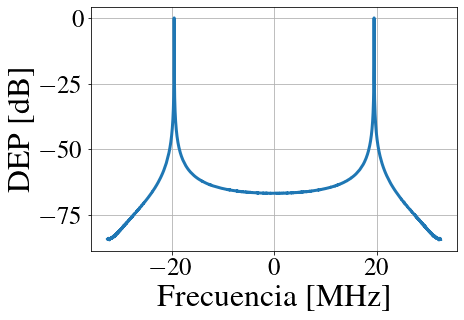

In [108]:
fftData = np.fft.fftshift(np.fft.fft(dataInData[1]))
fs = 65e6
freq = np.linspace(-fs/2, fs/2, len(fftData))
dep_db = 20*np.log10(np.abs(fftData) / np.max(np.abs(fftData)))
plt.figure()
plt.plot(freq*1e-6, dep_db,lw=3)
plt.grid()

plt.xlabel('Frecuencia [MHz]')
plt.ylabel('DEP [dB]')
plt.tight_layout()
plt.savefig('unTonoSinRuido/input.pdf')

## Band Mixer

### Oscillator input

In [57]:
bandMixerOscillator = pd.read_table('unTonoSinRuido/bandMixerOscillator.lst', sep=' ', skipinitialspace=True, skiprows=4, keep_default_na = False, header=None)

In [58]:
bandMixerOscillatorData = get_data(bandMixerOscillator, 16, 5000)

(30000000000000.0, 31000000000000.0)

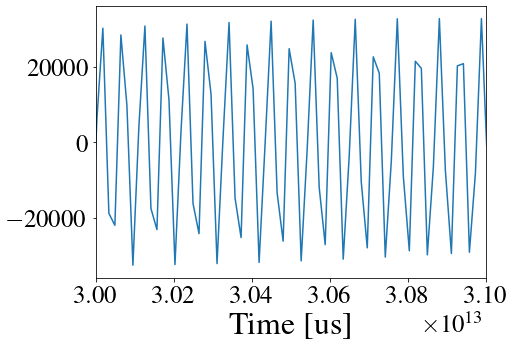

In [59]:
plt.figure()
plt.plot(bandMixerOscillatorData[0]*1e6, bandMixerOscillatorData[2])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.1e13])


In [60]:
fs = 65e6
freq, fftData = fft(bandMixerOscillatorData, fs)

Text(0.5, 0, 'Frequency [MHz]')

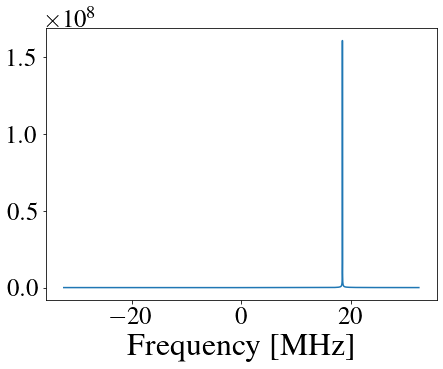

In [61]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')

### Output

In [62]:
bandMixer = pd.read_table('unTonoSinRuido/bandMixer.lst', sep=' ', skipinitialspace=True, skiprows=4, keep_default_na = False, header=None)

In [63]:
bandMixerData = get_data(bandMixer, 16, 5000)

(30000000000000.0, 33000000000000.0)

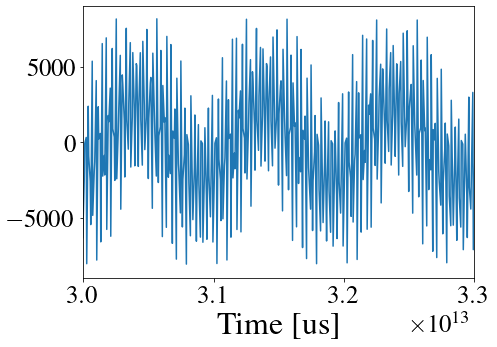

In [64]:
plt.figure()
plt.plot(bandMixerData[0]*1e6, bandMixerData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.3e13])


Text(0.5, 0, 'Frequency [MHz]')

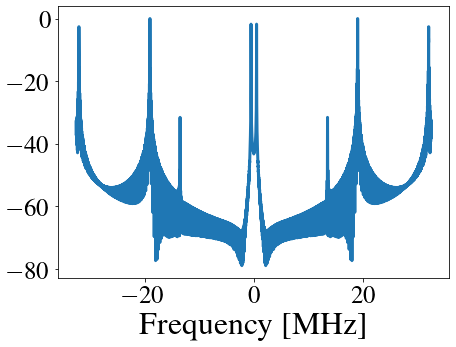

In [96]:
fftData = np.fft.fftshift(np.fft.fft(bandMixerData[1]))
fs = 65e6
freq = np.linspace(-fs/2, fs/2, len(fftData))
dep_db = 20*np.log10(np.abs(fftData) / np.max(np.abs(fftData)))
plt.figure()
plt.plot(freq*1e-6, dep_db,lw=3)
plt.xlabel('Frequency [MHz]')

In [66]:
fs = 65e6
freq, fftData = fft(bandMixerData, fs)

Text(0.5, 0, 'Frequency [MHz]')

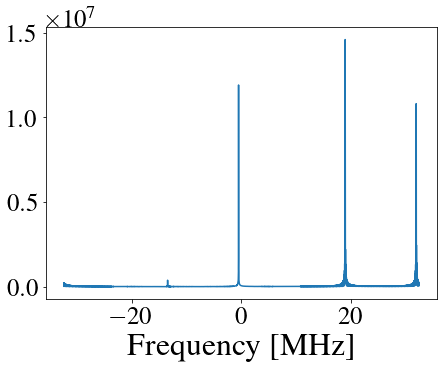

In [67]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')


## Band Filter

In [68]:
bandFilter = pd.read_table('unTonoSinRuido/bandFilter.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [69]:
bandFilterData = get_data(bandFilter, 16, 5000)

(30000000000000.0, 33000000000000.0)

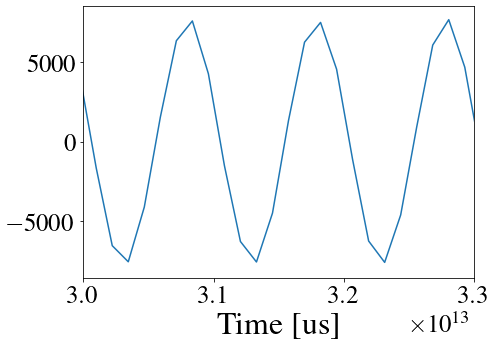

In [70]:
plt.figure()
plt.plot(bandFilterData[0]*1e6, bandFilterData[1])
plt.xlabel('Time [us]')
plt.xlim([3e13,3.3e13])

In [71]:
fs = 8.125e6
freq, fftData = fft(bandFilterData, fs)

Text(0.5, 0, 'Frequency [MHz]')

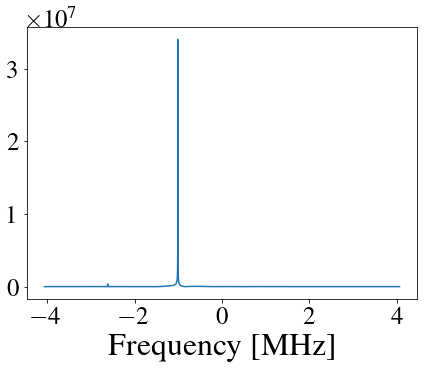

In [72]:
plt.figure()
plt.plot(freq*1e-6, np.abs(fftData))
plt.xlabel('Frequency [MHz]')

## Channel Mixer

In [73]:
chMixer = pd.read_table('unTonoSinRuido/chMixer.lst', sep=' ', skipinitialspace=True, skiprows=2, keep_default_na = False, header=None)

In [74]:
chMixerData = get_data(chMixer,16,5000)

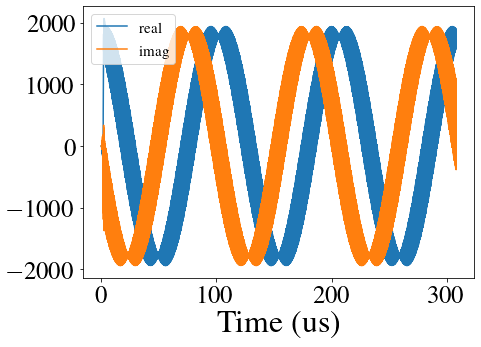

In [75]:
plt.figure()
plt.plot(chMixerData[0]*1e-6, chMixerData[1], label='real')
plt.plot(chMixerData[0]*1e-6, chMixerData[2], label='imag')
plt.legend()
plt.xlabel('Time (us)')
plt.show()

In [76]:
fft_re = np.fft.fftshift(np.fft.fft(chMixerData[1]))
fft_im = np.fft.fftshift(np.fft.fft(chMixerData[2]))
fs = 8.125*1e6
freq = np.linspace(-fs/2,fs/2,len(fft_re))

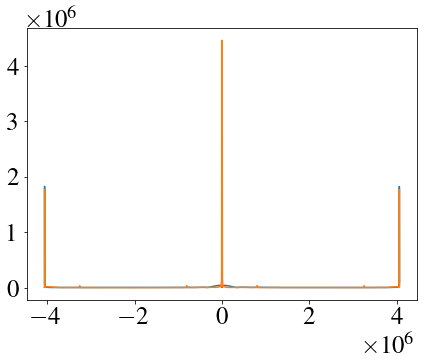

In [77]:
plt.figure()
plt.plot(freq, np.abs(fft_re), label='real')
plt.plot(freq, np.abs(fft_im), label='imag')

In [78]:
fft_data = fft(chMixerData, 8.125e6)

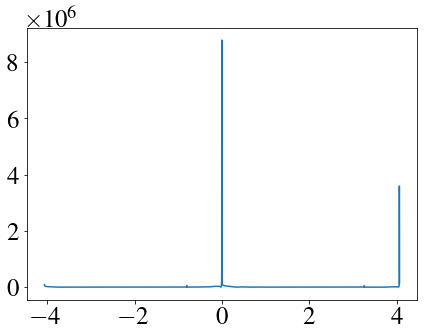

In [79]:
plt.figure()
plt.plot(fft_data[0]*1e-6, np.abs(fft_data[1]))
#plt.xlim([-15,15])

## Channel Filter

In [80]:
chFilter = pd.read_table('unTonoSinRuido/chFilter.lst', sep=' ', skipinitialspace=True, skiprows=0, keep_default_na = False, header=None)

In [81]:
chFilterData = get_data(chFilter, 40)

Text(0.5, 0, 'Time [us]')

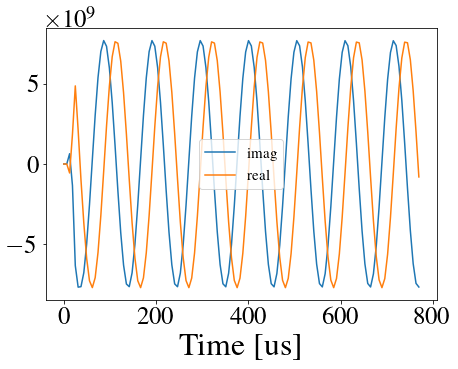

In [82]:
plt.figure()
plt.plot(chFilterData[0]*1e-6, chFilterData[1], label='imag')
plt.plot(chFilterData[0]*1e-6, chFilterData[2], label='real')
plt.legend()
plt.xlabel('Time [us]')

In [109]:
fs = 162.5e3
freq, fftData = fft(chFilterData, fs)
dep_db = 20*np.log10(np.abs(fftData) / np.max(np.abs(fftData)))

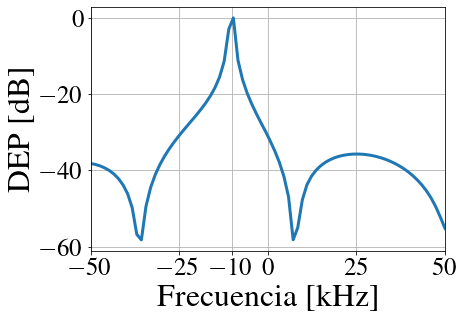

In [115]:
plt.figure()
plt.plot(-1*freq*1e-3, dep_db, lw=3)
plt.xlabel('Frecuencia [kHz]')
plt.ylabel('DEP [dB]')
#plt.axvline(x=-10, color='r', lw=2)
plt.xlim([-50,50])
plt.xticks(np.append(np.arange(-50, 51, 25), -10))
plt.grid()
plt.tight_layout()
plt.savefig('unTonoSinRuido/chFilter.pdf')